In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
import scipy.stats as stats

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 17
plt.rcParams['axes.unicode_minus']=False  

In [8]:
data=pd.read_csv("주민등록인구_20230428154200.csv")

In [9]:
seoul_2020_p=data[['동별(2)','2020 4/4']].sort_values(by='2020 4/4', ascending=False)
seoul_2020_p.columns=['구별','인구수']
seoul_2020_p.reset_index(drop=True, inplace=True)
seoul_2020_p.rename(columns={'인구수':'인구수20'},inplace=True)
seoul_2020_p=seoul_2020_p.set_index('구별')

In [10]:
seoul_2021_p=data[['동별(2)','2021 4/4']].sort_values(by='2021 4/4', ascending=False)
seoul_2021_p.columns=['구별','인구수']
seoul_2021_p.reset_index(drop=True, inplace=True)
seoul_2021_p.rename(columns={'인구수':'인구수21'},inplace=True)
seoul_2021_p=seoul_2021_p.set_index('구별')

In [11]:
seoul_p=pd.concat([seoul_2020_p,seoul_2021_p],axis=1,join='inner')

In [12]:
data1=pd.read_excel("서울20년1월부터12월.xlsx")

In [13]:
data1[['시','구','도로명']]=data1["주소"].str.split(' ', n=2, expand=True)
data2=data1.groupby('구')['충전량'].sum().sort_values(ascending=False)
data2= data2.reset_index()
seoul_2020_e=pd.DataFrame(data=data2)

In [14]:
seoul_2020_e=seoul_2020_e.loc[0:24]
seoul_2020_e=seoul_2020_e.rename(columns={'구':'구별'})
seoul_2020_e=seoul_2020_e.set_index('구별')
seoul_2020_e=seoul_2020_e.rename(columns = {'충전량':'충전량20'})

In [15]:
data3=pd.read_excel("서울21년1월부터12월이상치제거.xlsx")

KeyboardInterrupt: 

In [ ]:
data4=data3.groupby('구')['충전량'].sum().sort_values(ascending=False)
data4=data4.reset_index()
seoul_2021_e=pd.DataFrame(data=data4)

In [ ]:
seoul_2021_e=seoul_2021_e.loc[0:24]
seoul_2021_e=seoul_2021_e.rename(columns={'구':'구별'})
seoul_2021_e=seoul_2021_e.set_index('구별')
seoul_2021_e=seoul_2021_e.rename(columns = {'충전량':'충전량21'})

In [ ]:
seoul_e=pd.concat([seoul_2020_e,seoul_2021_e],axis=1,join='inner')

In [ ]:
data5=pd.read_excel("21년 1월 기준 서울 자치구별 연료별 자동차등록 현황.xls")

In [ ]:
data5=data5.drop(columns='Unnamed: 0')
data6=data5[data5['연료별']=='전기']
data6.reset_index(drop=True, inplace=True)
seoul_2020=data6.groupby('시군구별')['계'].sum().sort_values(ascending=False)
seoul_2020_c=pd.DataFrame(data=seoul_2020)
seoul_2020_c.reset_index(inplace=True)
seoul_2020_c.columns=['구','전기차대수']
seoul_2020_c=seoul_2020_c.rename(columns={'구':'구별','전기차대수':'전기차대수20'})
seoul_2020_c=seoul_2020_c.set_index('구별')

In [ ]:
data7=pd.read_excel("22년 1월 기준 서울 자치구별 연료별 자동차등록 현황.xls")

In [ ]:
# data7=data7.drop(columns='Unnamed: 0')
data8=data7[data7['연료별']=='전기']
data8.reset_index(drop=True, inplace=True)
seoul_2021=data8.groupby('시군구별')['계'].sum().sort_values(ascending=False)
seoul_2021_c=pd.DataFrame(data=seoul_2021)
seoul_2021_c.reset_index(inplace=True)
seoul_2021_c.columns=['구','전기차대수']
seoul_2021_c=seoul_2021_c.rename(columns={'구':'구별','전기차대수':'전기차대수21'})
seoul_2021_c=seoul_2021_c.set_index('구별')

In [ ]:
seoul_c=pd.concat([seoul_2020_c,seoul_2021_c],axis=1,join='inner')

In [ ]:
data9=pd.read_excel("서울전기차충전소.xlsx")

In [ ]:
data9[['시','구','도로명주소']]=data9['addr'].str.split(' ',n=2, expand=True)
seoul_a=data9.groupby('구')['stat_nm'].nunique().sort_values(ascending=False)
seoul_a=pd.DataFrame(data=seoul_a)
seoul_a.reset_index(inplace=True)
seoul_a.columns=['구','충전기대수']
seoul_a=seoul_a.rename(columns={'구':'구별'})
seoul_a=seoul_a.set_index('구별')

### 충전기대수 대비 충전량

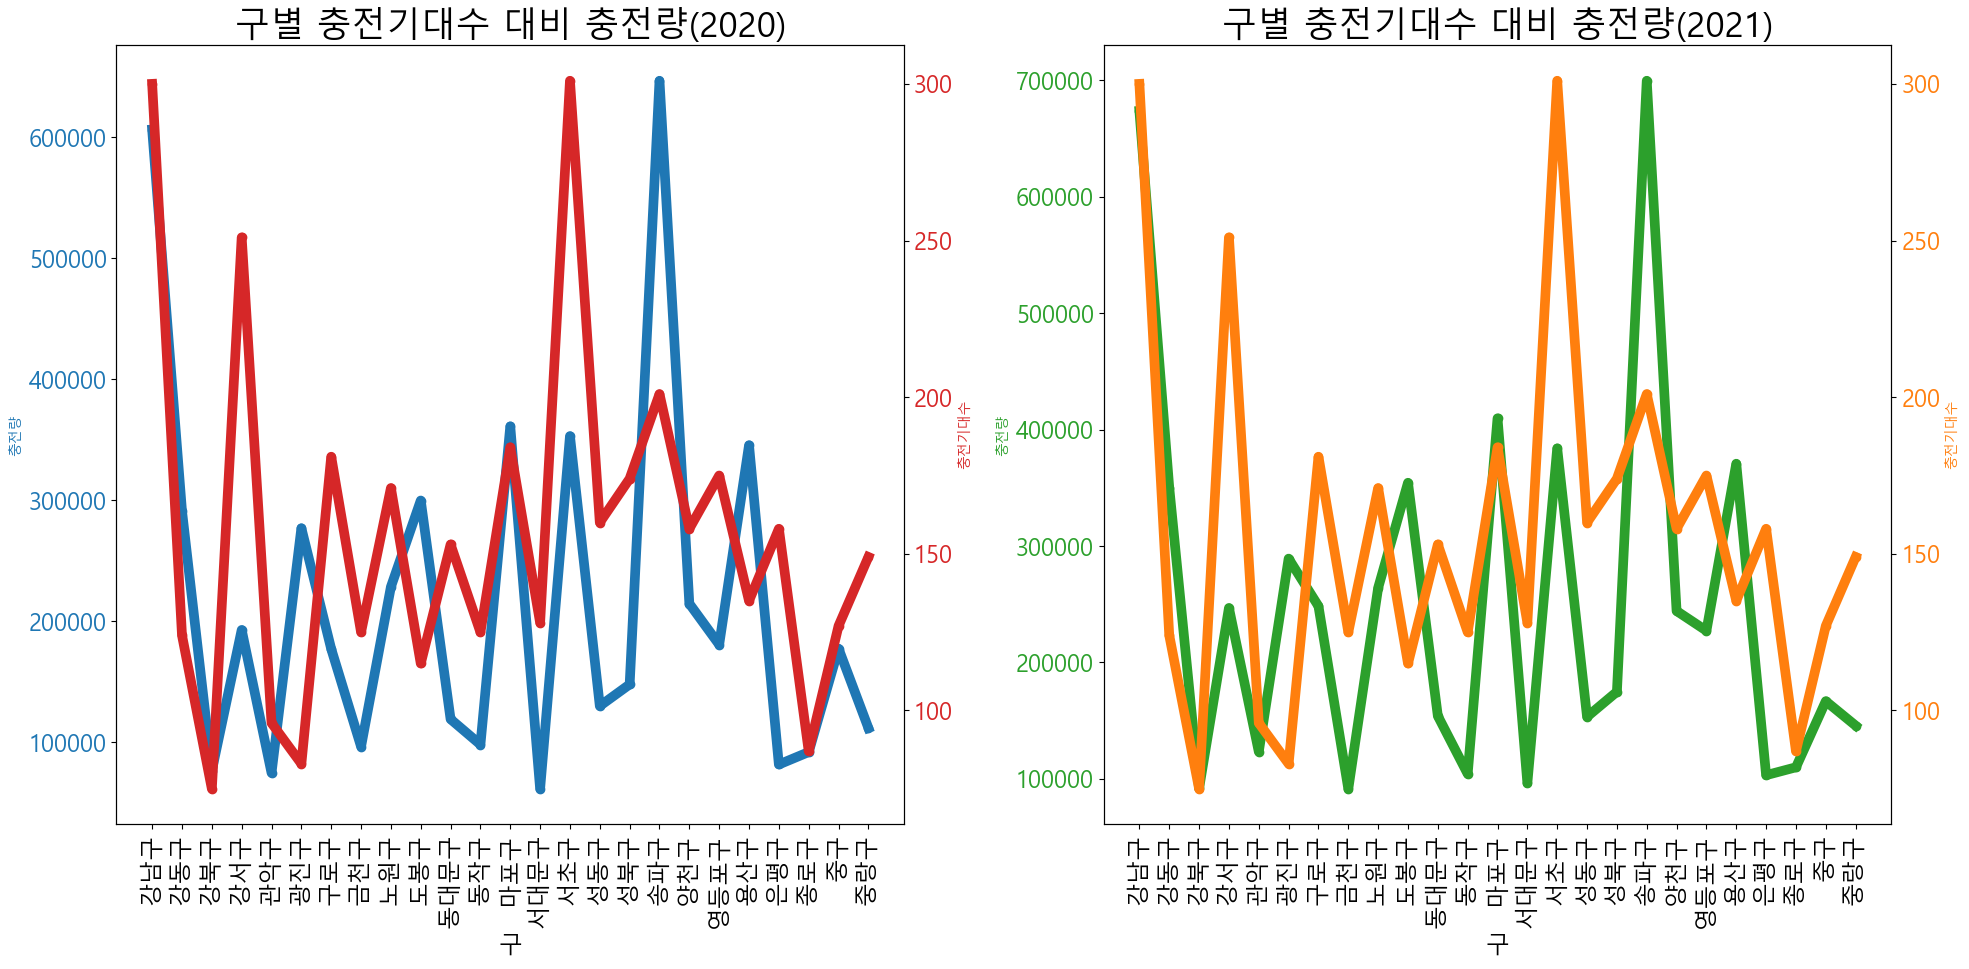

In [ ]:
seoul_e=seoul_e.sort_index(ascending=True)
seoul_a=seoul_a.sort_index(ascending=True)
fig, ax1 = plt.subplots(figsize=(20,10),nrows=1,ncols=2)

color_1 = 'tab:blue'
ax1[0].set_title('구별 충전기대수 대비 충전량(2020)', fontsize=25)
ax1[0].set_xlabel('구')
ax1[0].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[0].plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1[0].set_xticklabels(ax1[0].get_xticklabels(),rotation=90)
ax1[0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('충전기대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_a['충전기대수'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

# 1행 2열 
color_1 = 'tab:green'
ax1[1].set_title('구별 충전기대수 대비 충전량(2021)', fontsize=25)
ax1[1].set_xlabel('구')
ax1[1].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[1].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1[1].set_xticklabels(ax1[1].get_xticklabels(),rotation=90)
ax1[1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:orange'
ax2.set_ylabel('충전기대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_a['충전기대수'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.tight_layout()
plt.show()

### 인구수 대비 충전량

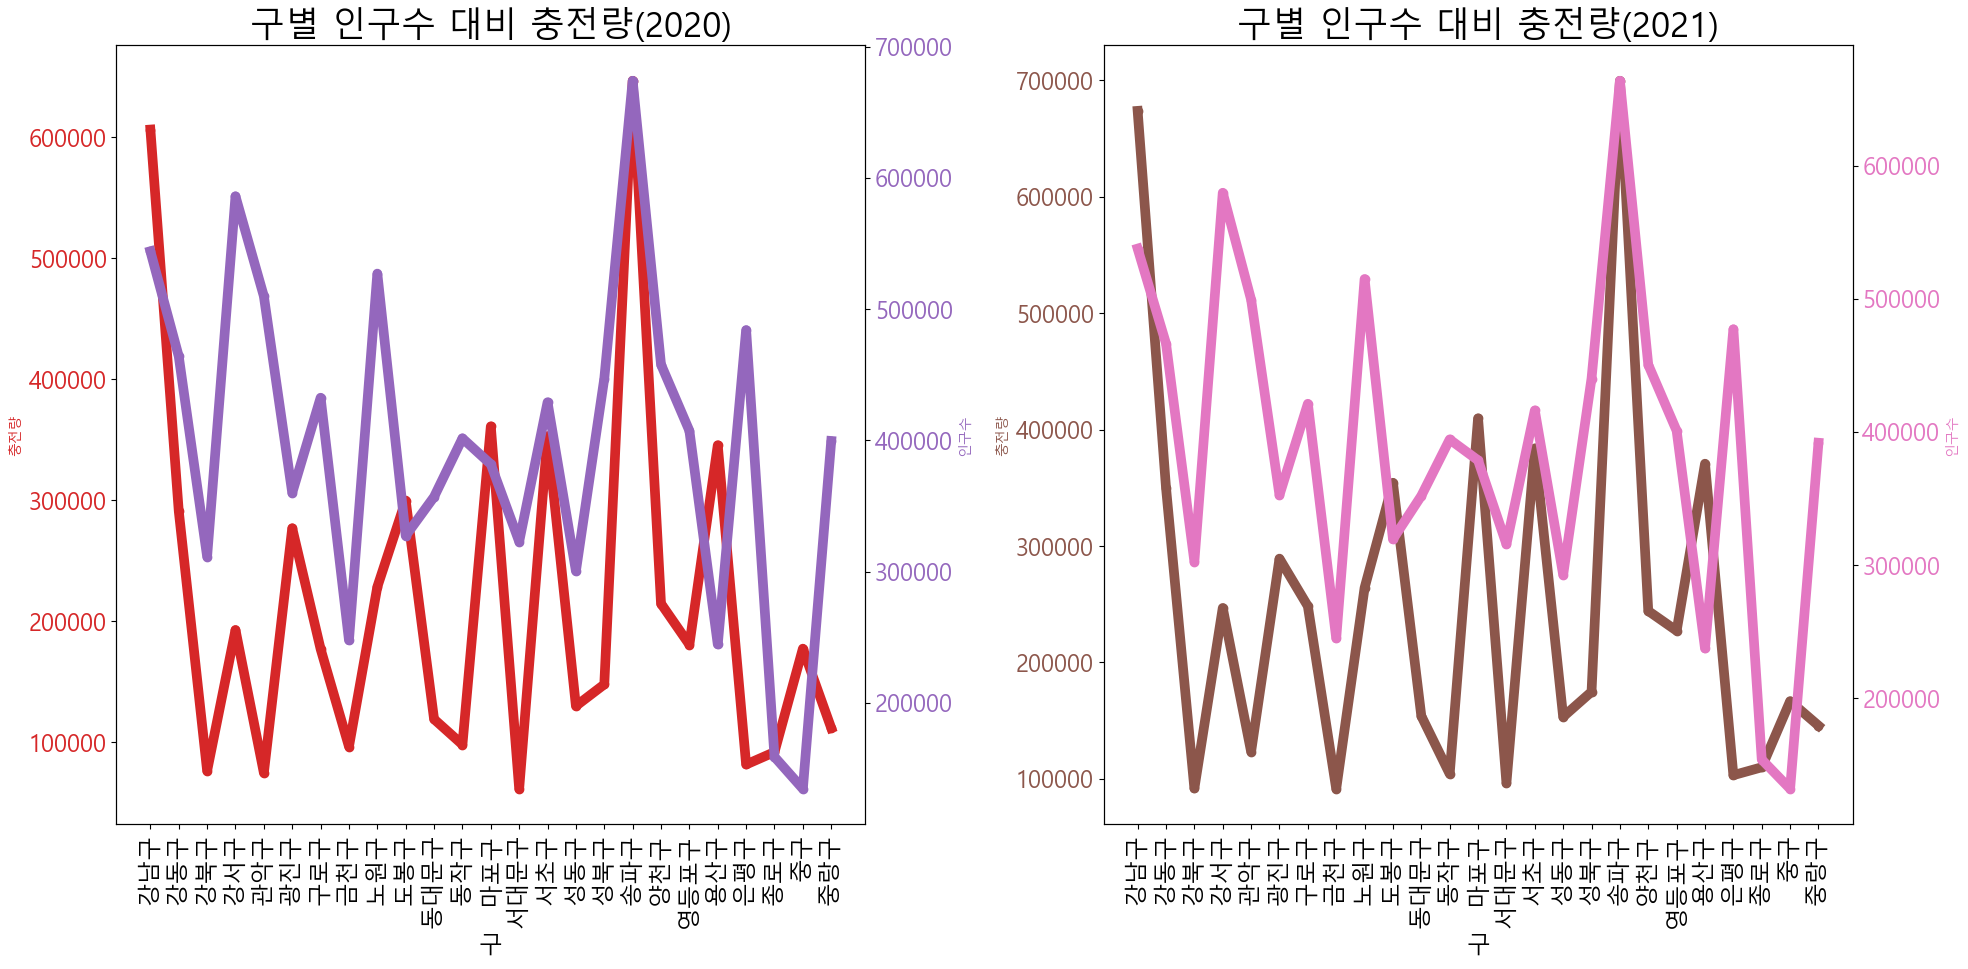

In [ ]:
seoul_p=seoul_p.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
fig, ax1 = plt.subplots(figsize=(20,10),nrows=1,ncols=2)
color_1 = 'tab:red'
ax1[0].set_title('구별 인구수 대비 충전량(2020)', fontsize=25)
ax1[0].set_xlabel('구')
ax1[0].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[0].plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1[0].set_xticklabels(ax1[0].get_xticklabels(),rotation=90)
ax1[0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:purple'
ax2.set_ylabel('인구수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_p['인구수20'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

color_1 = 'tab:brown'
ax1[1].set_title('구별 인구수 대비 충전량(2021)', fontsize=25)
ax1[1].set_xlabel('구')
ax1[1].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[1].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1[1].set_xticklabels(ax1[1].get_xticklabels(),rotation=90)
ax1[1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:pink'
ax2.set_ylabel('인구수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_p['인구수21'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.tight_layout()
plt.show()

### 전기차대수 대비 충전량

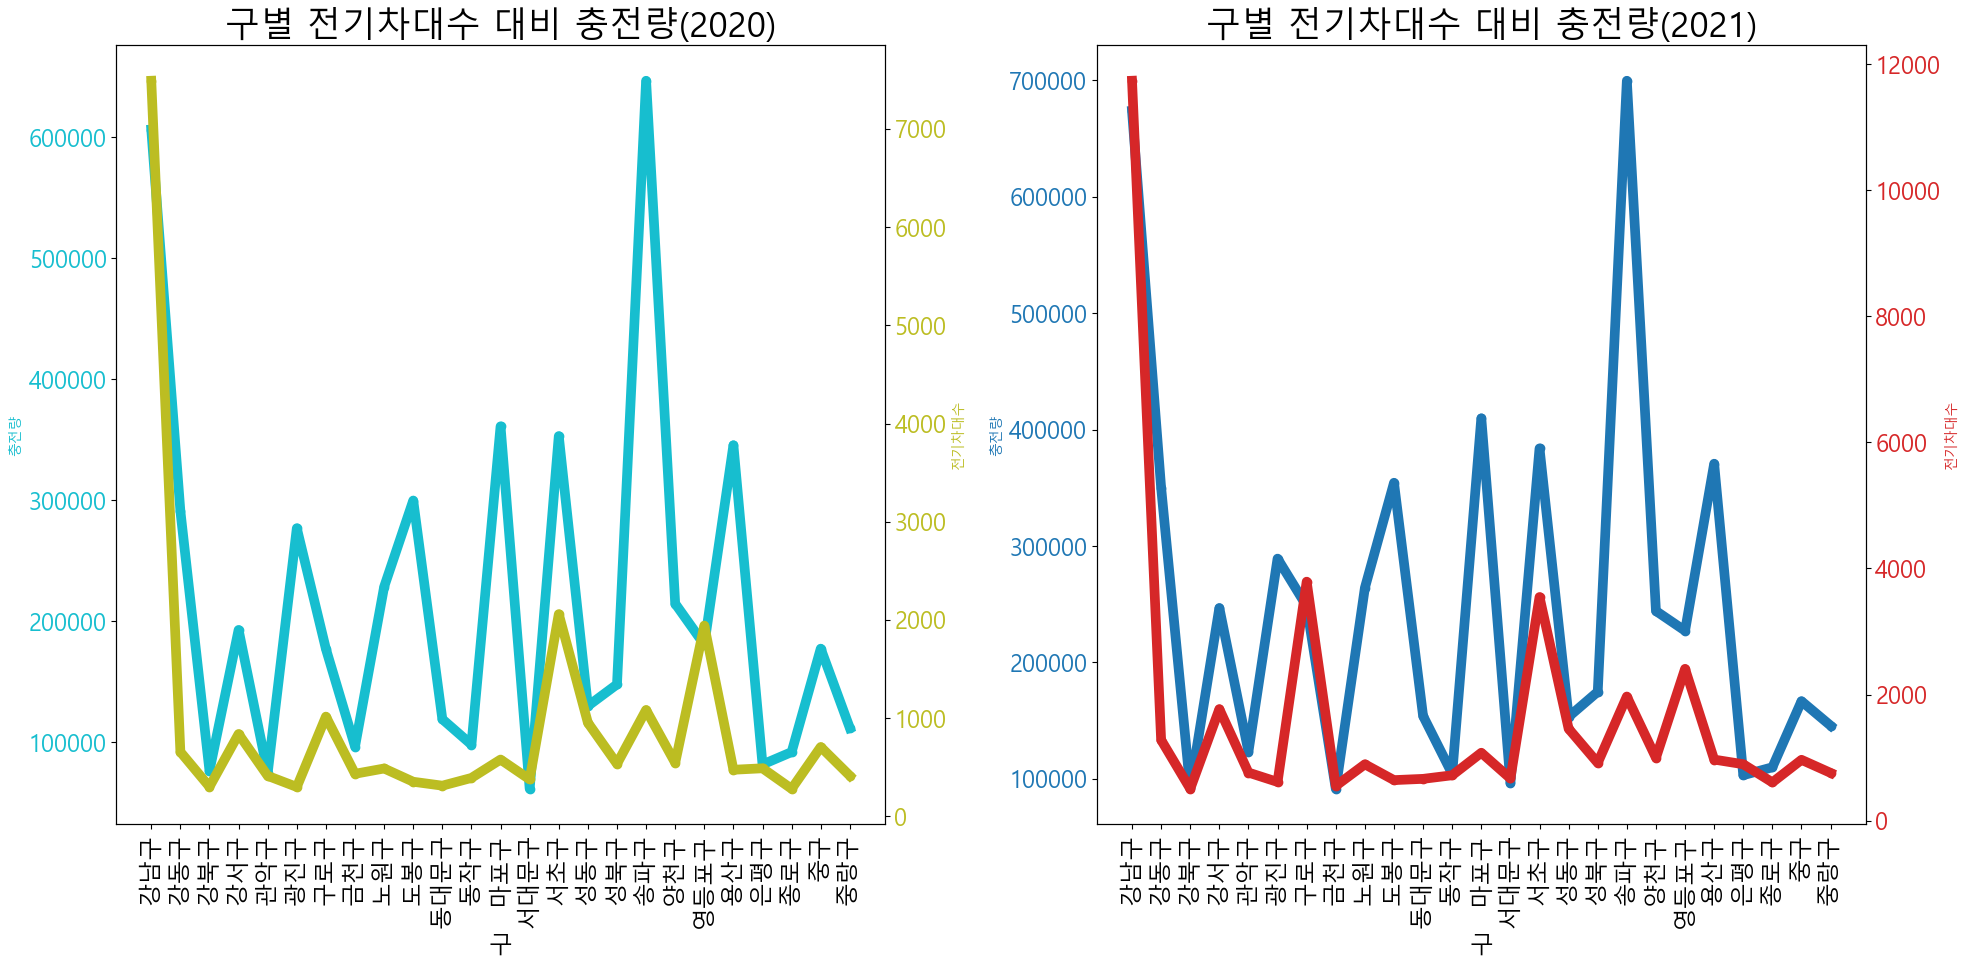

In [ ]:
seoul_c=seoul_c.sort_index(ascending=True)
seoul_e=seoul_e.sort_index(ascending=True)
fig, ax1 = plt.subplots(figsize=(20,10),nrows=1,ncols=2)
color_1 = 'tab:cyan'
ax1[0].set_title('구별 전기차대수 대비 충전량(2020)', fontsize=25)
ax1[0].set_xlabel('구')
ax1[0].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[0].plot(seoul_e.index, seoul_e.충전량20, marker='o', color=color_1,linewidth=7)
ax1[0].set_xticklabels(ax1[0].get_xticklabels(),rotation=90)
ax1[0].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[0].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:olive'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_c['전기차대수20'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

color_1 = 'tab:blue'
ax1[1].set_title('구별 전기차대수 대비 충전량(2021)', fontsize=25)
ax1[1].set_xlabel('구')
ax1[1].set_ylabel('충전량', fontsize=10, color=color_1)
ax1[1].plot(seoul_e.index, seoul_e.충전량21, marker='o', color=color_1,linewidth=7)
ax1[1].set_xticklabels(ax1[1].get_xticklabels(),rotation=90)
ax1[1].tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1[1].twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('전기차대수', fontsize=10, color=color_2)
ax2.plot(seoul_e.index, seoul_c['전기차대수21'], marker='o', color=color_2,linewidth=7)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.tight_layout()
plt.show()

### 충전기 종류 대비 충전량

In [ ]:
energy=pd.read_csv("data/한국전력공사_전기차충전소충전량(202001_202006).csv",encoding="cp949")
energy2=pd.read_csv("data/한국전력공사_전기차충전소충전량(202007_202012).csv",encoding="cp949")
energy3=pd.read_csv("data/한국전력공사_전기차충전소충전량(202101_202106).csv",encoding="cp949")
energy4=pd.read_csv("data/한국전력공사_전기차충전소충전량(202107_202112).csv",encoding="cp949")

In [ ]:
energy['지역']=energy['주소'].str.split(" ").str.get(0)
energy2['지역']=energy2['주소'].str.split(" ").str.get(0)
energy3['지역']=energy3['주소'].str.split(" ").str.get(0)
energy4['지역']=energy4['주소'].str.split(" ").str.get(0)
energy=energy[['지역','충전기구분','충전량']]
energy2=energy2[['지역','충전기구분','충전량']]
energy3=energy3[['지역','충전기구분','충전량']]
energy4=energy4[['지역','충전기구분','충전량']]


In [ ]:
seoul1 = energy[energy['지역']=='서울특별시']
seoul2 = energy2[energy2['지역']=='서울특별시']
seoul3 = energy3[energy3['지역']=='서울특별시']
seoul4 = energy4[energy4['지역']=='서울특별시']
seoul_2020 = pd.concat([seoul1,seoul2])
seoul_2021 = pd.concat([seoul3,seoul4])
seoul_2020.reset_index(drop=True,inplace=True)
seoul_2021.reset_index(drop=True,inplace=True)
seoul_2020.drop(columns='지역',inplace=True)
seoul_2021.drop(columns='지역',inplace=True)
seoul_2020=seoul_2020.groupby(['충전기구분'])['충전량'].sum().reset_index()
seoul_2021=seoul_2021.groupby(['충전기구분'])['충전량'].sum().reset_index()
seoul_2020['충전량']=seoul_2020['충전량'].astype(int)
seoul_2021['충전량']=seoul_2021['충전량'].astype(int)


In [ ]:
seoul_2020=seoul_2020.rename(columns={'충전량':'충전량20'})
seoul_2021=seoul_2021.rename(columns={'충전량':'충전량21'})
seoul_2020=seoul_2020.set_index('충전기구분')
seoul_2021=seoul_2021.set_index('충전기구분')

In [ ]:
seoul_t=pd.concat([seoul_2020,seoul_2021],axis=1,join='inner')


In [ ]:
seoul_t

,충전량20,충전량21
충전기구분,,
급속,3255644,3520994
완속,2197888,2781596


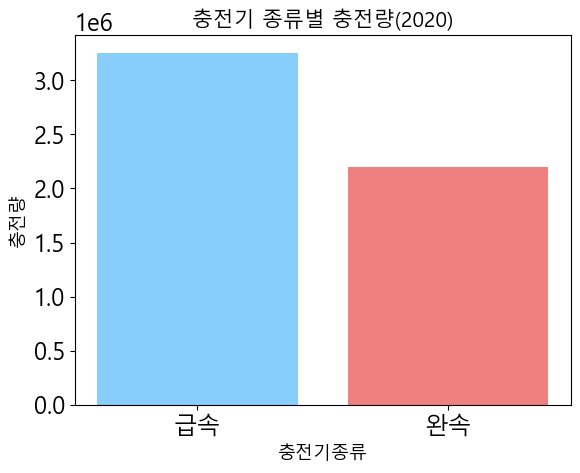

In [ ]:
colors = ['lightskyblue', 'lightcoral']
x=seoul_t.index
y=seoul_t['충전량20']
plt.bar(x,y,color=colors)
plt.title('충전기 종류별 충전량(2020)',fontsize=15)
plt.xlabel('충전기종류',fontsize=13)
plt.ylabel('충전량',fontsize=13)
plt.show()

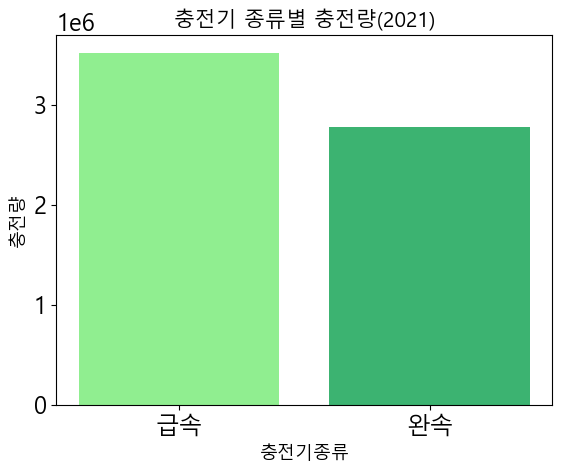

In [ ]:
colors = ["lightgreen", "mediumseagreen"]
x=seoul_t.index
y=seoul_t['충전량21']
plt.bar(x,y,color=colors)
plt.title('충전기 종류별 충전량(2021)',fontsize=15)
plt.xlabel('충전기종류',fontsize=13)
plt.ylabel('충전량',fontsize=13)
plt.show()

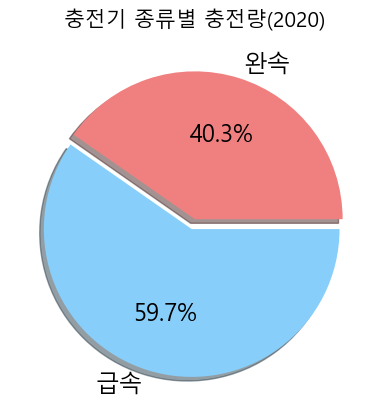

In [ ]:
ratio = [3255644, 2197888]
labels = ['급속','완속']
colors = ['lightskyblue', 'lightcoral']
explode=[0.07,0]
plt.title('충전기 종류별 충전량(2020)',fontsize=15)

plt.pie(ratio, labels=labels, autopct='%.1f%%', counterclock=False, shadow=True,explode=explode,colors=colors)
plt.show()

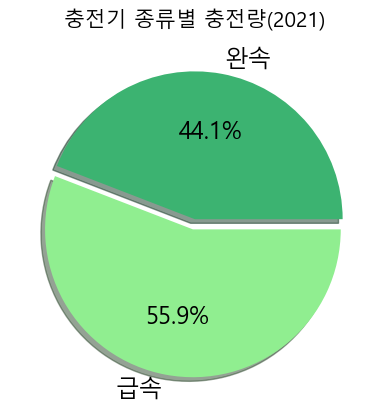

In [ ]:
ratio = [3520994, 2781596]
labels = ['급속','완속']
colors = ["lightgreen", "mediumseagreen"]
explode=[0.07,0]
plt.title('충전기 종류별 충전량(2021)',fontsize=15)

plt.pie(ratio, labels=labels, autopct='%.1f%%', counterclock=False, shadow=True,explode=explode,colors=colors)
plt.show()